<a href="https://colab.research.google.com/github/bibekuchiha/-ANZ-Data-ANZ-Program/blob/master/Task2(Predictive).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_predict





In [46]:
df = pd.read_excel("ANZ synthesised transaction dataset.xlsx")
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit




Modifying Data to obtain salary


In [47]:
salary_txns = df[df['txn_description'] == 'PAY/SALARY']
salary_txns.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
50,posted,NaN,0,ACC-588564840,AUD,151.27 -33.76,PAY/SALARY,NaN,0.0,Isaiah,8342.11,2018-08-01,M,23,NaN,NaN,2018-08-01T11:00:00.000+0000,3903.95,9ca281650e5d482d9e53f85e959baa66,Australia,CUS-1462656821,NaN,credit
61,posted,NaN,0,ACC-1650504218,AUD,145.01 -37.93,PAY/SALARY,NaN,0.0,Marissa,2040.58,2018-08-01,F,23,NaN,NaN,2018-08-01T12:00:00.000+0000,1626.48,1822eb0e1bbe4c9e95ebbb0fa2cc4323,Australia,CUS-2500783281,NaN,credit
64,posted,NaN,0,ACC-3326339947,AUD,151.18 -33.80,PAY/SALARY,NaN,0.0,Eric,3158.51,2018-08-01,M,22,NaN,NaN,2018-08-01T12:00:00.000+0000,983.36,bd62b1799a454cedbbb56364f7c40cbf,Australia,CUS-326006476,NaN,credit
68,posted,NaN,0,ACC-3541460373,AUD,145.00 -37.83,PAY/SALARY,NaN,0.0,Jeffrey,2517.66,2018-08-01,M,24,NaN,NaN,2018-08-01T13:00:00.000+0000,1408.08,0d95c7c932bb48e5b44c2637bdd3efe9,Australia,CUS-1433879684,NaN,credit
70,posted,NaN,0,ACC-2776252858,AUD,144.95 -37.76,PAY/SALARY,NaN,0.0,Kristin,2271.79,2018-08-01,F,43,NaN,NaN,2018-08-01T13:00:00.000+0000,1068.04,f50ccf1195214d14a0acbfcb5a265193,Australia,CUS-4123612273,NaN,credit


In [48]:
salary_txns = salary_txns.drop(['status', 
                                'card_present_flag', 
                                'bpay_biller_code', 
                                'currency', 
                                'merchant_id', 
                                'merchant_code', 
                                'merchant_suburb',
                                'merchant_state', 
                                'country', 
                                'merchant_long_lat', 
                                'movement',
                                'txn_description',
                                'extraction',
                                'transaction_id'], axis=1)
salary_txns = salary_txns.reset_index(drop=True)



In [49]:
salary_txns.head()

,account,long_lat,first_name,balance,date,gender,age,amount,customer_id
0,ACC-588564840,151.27 -33.76,Isaiah,8342.11,2018-08-01,M,23,3903.95,CUS-1462656821
1,ACC-1650504218,145.01 -37.93,Marissa,2040.58,2018-08-01,F,23,1626.48,CUS-2500783281
2,ACC-3326339947,151.18 -33.80,Eric,3158.51,2018-08-01,M,22,983.36,CUS-326006476
3,ACC-3541460373,145.00 -37.83,Jeffrey,2517.66,2018-08-01,M,24,1408.08,CUS-1433879684
4,ACC-2776252858,144.95 -37.76,Kristin,2271.79,2018-08-01,F,43,1068.04,CUS-4123612273



Split long_lat column


In [50]:
long_lat = salary_txns['long_lat'].str.split("-", n = 1, expand = True)
salary_txns['long'] = long_lat[0]
salary_txns['lat'] = long_lat[1]
salary_txns = salary_txns.drop(['long_lat'], axis = 1)

In [55]:
salary_txns.head()

,account,first_name,balance,date,gender,age,amount,customer_id,long,lat
0,ACC-588564840,Isaiah,8342.11,2018-08-01,M,23,3903.95,CUS-1462656821,151.27,33.76
1,ACC-1650504218,Marissa,2040.58,2018-08-01,F,23,1626.48,CUS-2500783281,145.01,37.93
2,ACC-3326339947,Eric,3158.51,2018-08-01,M,22,983.36,CUS-326006476,151.18,33.80
3,ACC-3541460373,Jeffrey,2517.66,2018-08-01,M,24,1408.08,CUS-1433879684,145.00,37.83
4,ACC-2776252858,Kristin,2271.79,2018-08-01,F,43,1068.04,CUS-4123612273,144.95,37.76


In [56]:
salary_txns.nunique()

account        100
first_name      80
balance        883
date            65
gender           2
age             33
amount         100
customer_id    100
long            87
lat             85
dtype: int64


Preparing the customer dataframe


In [57]:
customers = list(salary_txns['customer_id'].unique())

customer_data = []

for cust in customers:
    salary_txns_subset = salary_txns[salary_txns['customer_id'] == cust]
    salary_txns_subset = salary_txns_subset.reset_index(drop=True)
    account = salary_txns_subset['account'][0]
    first_name = salary_txns_subset['first_name'][0]
    gender = salary_txns_subset['gender'][0]
    age = salary_txns_subset['age'][0]
    long = salary_txns_subset['long'][0]
    lat = salary_txns_subset['lat'][0]
    avg_balance = round(sum(salary_txns_subset['balance']) / len(salary_txns_subset), 2)
    avg_salary = round(sum(salary_txns_subset['amount']) / len(salary_txns_subset), 2)
    row = (cust, account, first_name, gender, age, long, lat, avg_balance, avg_salary, round(avg_salary*12,2))
    customer_data.append(row)
    
customer_df = pd.DataFrame(customer_data, columns = ('customer_id',
                                                     'account',
                                                     'first_name',
                                                     'gender',
                                                     'age',
                                                     'long',
                                                     'lat',
                                                     'avg_balance',
                                                     'avg_salary',
                                                     'annual_salary')
                          )

# change gender to dummy variable
customer_df = pd.get_dummies(customer_df, columns = ['gender'], drop_first = True)

customer_df.head()


,customer_id,account,first_name,age,long,lat,avg_balance,avg_salary,annual_salary,gender_M
0,CUS-1462656821,ACC-588564840,Isaiah,23,151.27,33.76,15887.91,3903.95,46847.40,1
1,CUS-2500783281,ACC-1650504218,Marissa,23,145.01,37.93,10741.09,1626.48,19517.76,0
2,CUS-326006476,ACC-3326339947,Eric,22,151.18,33.80,8317.03,983.36,11800.32,1
3,CUS-1433879684,ACC-3541460373,Jeffrey,24,145.00,37.83,3877.38,1408.08,16896.96,1
4,CUS-4123612273,ACC-2776252858,Kristin,43,144.95,37.76,5210.70,1068.04,12816.48,0



Data Visualisation


Text(0, 0.5, 'Annual Salary')

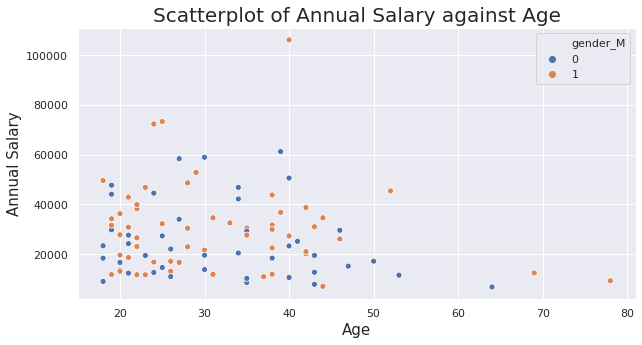

In [58]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(10,5)})
age_salary_graph = sns.scatterplot(x="age", y="annual_salary", hue = 'gender_M', data=customer_df)
age_salary_graph.axes.set_title("Scatterplot of Annual Salary against Age",fontsize=20)
age_salary_graph.set_xlabel("Age", fontsize=15)
age_salary_graph.set_ylabel("Annual Salary", fontsize=15)

Text(0, 0.5, 'Annual Salary')

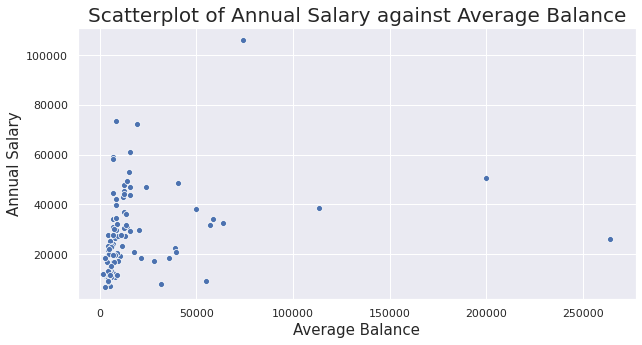

In [59]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(10,5)})
age_salary_graph = sns.scatterplot(x="avg_balance", y="annual_salary", data=customer_df)
age_salary_graph.axes.set_title("Scatterplot of Annual Salary against Average Balance",fontsize=20)
age_salary_graph.set_xlabel("Average Balance", fontsize=15)
age_salary_graph.set_ylabel("Annual Salary", fontsize=15)


# Predictive Analytics
## Linear Regression

In [60]:
# Split data
train, test = train_test_split(customer_df, test_size=0.2)
X = train[['age', 'avg_balance', 'long', 'lat', 'gender_M']]
y = train['annual_salary']
X_test = test[['age', 'avg_balance', 'long', 'lat', 'gender_M']]
y_test = test['annual_salary']

# Instantiate model
lm = LinearRegression()

# Fit model
lm.fit(X,y)

# Print the R-squared value for the model
lm.score(X, y)



0.15091429391393918

In [61]:
# Predict
y_predict = lm.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_predict)))



15023.176170165321


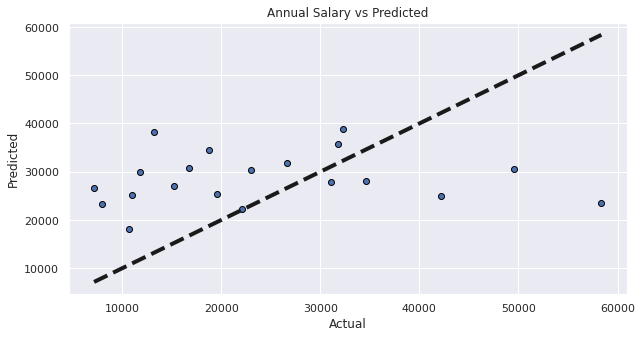

In [62]:
# Plot of predicted salary against actual salary
fig, ax = plt.subplots()
ax.scatter(y_test, y_predict, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Annual Salary vs Predicted")
plt.show()




Linear Regression Model Conclusion:

    The linear regression model achieved an R-squared value of 0.139. As the R-squared value is closer to 0, it indicates that the model explains very little of the variability of the annual salary.

    The model also achieved a Root Mean Squared Error (RMSE) of 15578. It is the square root of the variance of the residuals. Residuals are a measure of how far from the regression line the data points are. In general, the lower the RMSE, the better the model is.

Hence, this Linear Regression model has performed very poorly in predicting the average salary of an ANZ customer.




# Decision Trees- Classification and Regression


In [64]:
# Instantiate model
model =  DecisionTreeRegressor(max_depth=5,random_state=0)

# Fit model
model.fit(X,y)

# Print the R-squared value for the model
model.score(X, y)


0.7300050897406382

In [65]:
# Predict
y_predict_2 = model.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_predict_2)))

23319.812782780427


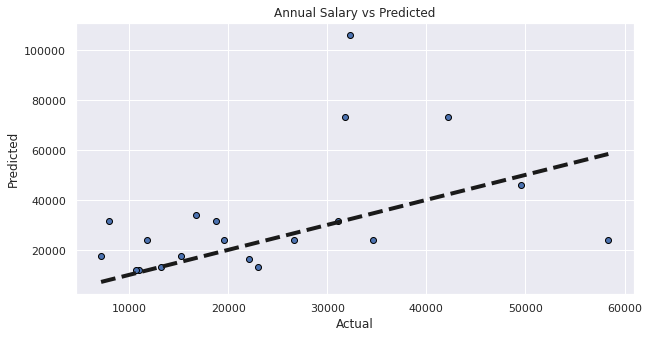

In [66]:
# Plot of predicted salary against actual salary
fig, ax = plt.subplots()
ax.scatter(y_test, y_predict_2, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Annual Salary vs Predicted")
plt.show()


Decision Tree Model Conclusion:

    The Decision Tree model achieved an R-squared value of 0.847. As the R-squared value is closer to 1, it indicates that the model is able to explain of the variability of the annual salary.

    On the other hand, the model achieved a Root Mean Squared Error (RMSE) of 19371. This is much higher than that of the linear regression model.

Hence, although the Decision Tree model has performed better than the Linear Regression model in terms of its R-square value, it has a higher RMSE. This means that the absolute fit of the model is much worse. Hence, I do not recommend using either models to segment the customers without improving the model. Some room for improvement include adding more relevant variables or using a different type of machine learning model.
